# Binary classification problem

In [112]:
import numpy as np
import subprocess

from IPython.display import Image

from collections import Counter

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

# classifiers
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# reproducibility
seed = 104

# Prepare data
 binary classification. Generate 20 dimensional artificial dataset with 1000 samples, where 8 features holding information, 3 are redundant and 2 repeated.

In [113]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=8, 
                           n_redundant=3, n_repeated=2, random_state=seed)

In [114]:
X[999]

array([ 0.6304144 , -2.49064484,  3.01541698,  3.34189084,  0.36573117,
        0.67139215,  3.40691204, -2.33833009, -2.36895435, -2.02711254,
        0.22735429,  0.18777006, -2.49064484, -1.21574167, -1.40255389,
       -3.76760528,  1.70669533,  2.14665732,  3.40691204, -1.83730377])

In [115]:
X[999][0]

0.6304143983567385

In [116]:
print("X Shape: {}".format(X.shape))
print("y Shape: {}".format(y.shape))

X Shape: (1000, 20)
y Shape: (1000,)


In [117]:
y[0]

0

## Split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [119]:
print("y_train Shape: {}".format(y_train.shape))
print("X_train Shape: {}".format(X_train.shape))
print("y_test Shape: {}".format(y_test.shape))
print("X_test Shape: {}".format(X_test.shape))

y_train Shape: (800,)
X_train Shape: (800, 20)
y_test Shape: (200,)
X_test Shape: (200, 20)


### Last sanity check

In [120]:
print("Train label distribution:")
print(Counter(y_train))

print("\nTest label distribution:")
print(Counter(y_test))

Train label distribution:
Counter({1: 404, 0: 396})

Test label distribution:
Counter({0: 106, 1: 94})


# Single Decision Tree

### Choose classifier

In [121]:
decision_tree = DecisionTreeClassifier(random_state=seed)

### Train classifier

In [122]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=104,
            splitter='best')

### Predict output

In [123]:
decision_tree_y_pred  = decision_tree.predict(X_test)
decision_tree_y_pred_prob  = decision_tree.predict_proba(X_test)

### Evaluation of metrics

In [124]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)
decision_tree_logloss = log_loss(y_test, decision_tree_y_pred_prob)

In [125]:
print("== Decision Tree ==")
print("Accuracy: {0:.2f}".format(decision_tree_accuracy))
print("Logarithmic loss: {0:.2f}".format(decision_tree_logloss))
print("Number of nodes created: {}".format(decision_tree.tree_.node_count))

== Decision Tree ==
Accuracy: 0.85
Logarithmic loss: 5.01
Number of nodes created: 143


# Accuracy vs Log Loss
**Accuracy** is the count of predictions where your predicted value equals the actual value. Accuracy is not always a good indicator because of its yes or no nature.

**Log Loss** takes into account the uncertainty of your prediction based on how much it varies from the actual label. This gives us a more nuanced view into the performance of our model.

#### About Log Loss
<img src="log.PNG" />

We can see two things:

1. the log loss score is not very promising (due to the fact that leaves in decision tree outputs either 0 or 1 as probability which is heaviliy penalized in case of errors, but the accuracy score is quite decent,
2. the tree is complicated (large number of nodes)

## Inspection

In [126]:
print('True labels:')
print(y_test[:5,])
print('\nPredicted labels:')
print(decision_tree_y_pred[:5,])
print('\nPredicted probabilities:')
print(decision_tree_y_pred_prob[:5,])

True labels:
[1 1 0 0 0]

Predicted labels:
[1 1 0 0 0]

Predicted probabilities:
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


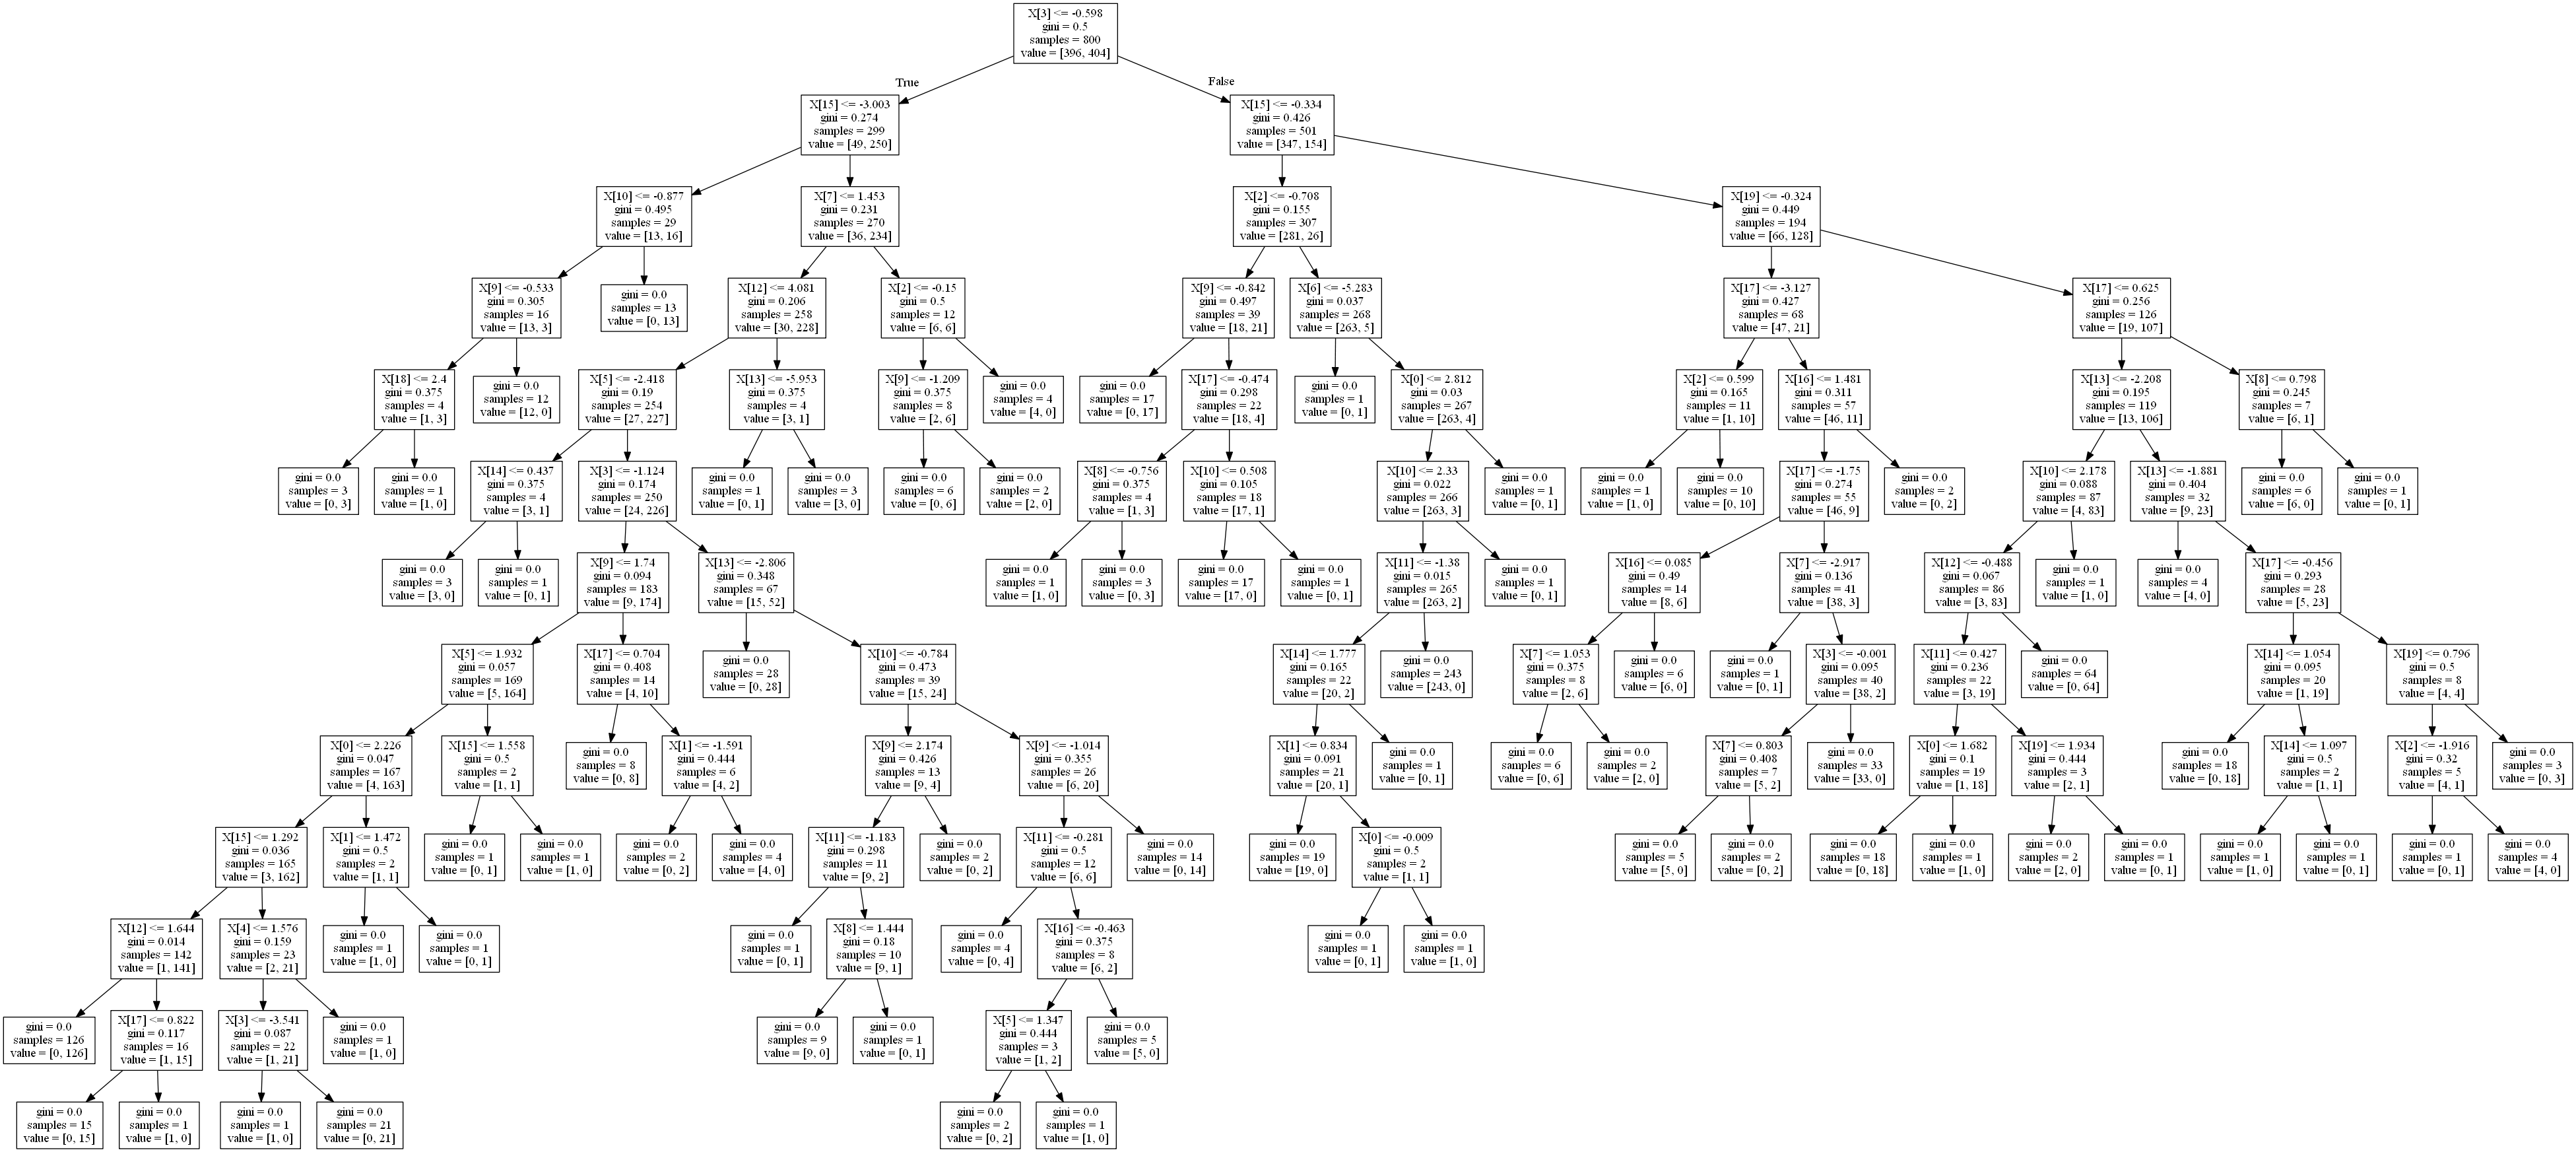

In [127]:
dt_viz_file = 'dt.dot'
dt_png_file = 'dt.png'

# create visualization
export_graphviz(decision_tree, out_file=dt_viz_file)

# convert to PNG
command = ["dot", "-Tpng", dt_viz_file, "-o", dt_png_file]
subprocess.check_call(command)

# display image
Image(filename=dt_png_file)

# AdaBoost

In [128]:
adaboost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    algorithm='SAMME',
    n_estimators=1000,
    random_state=seed)

# train classifier
adaboost.fit(X_train, y_train)

# calculate predictions
adaboost_y_pred = adaboost.predict(X_test)
adaboost_y_pred_prob = adaboost.predict_proba(X_test)

# evaluate
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
adaboost_logloss = log_loss(y_test, adaboost_y_pred_prob)

print("== AdaBoost ==")
print("Accuracy: {0:.2f}".format(adaboost_accuracy))
print("Log loss: {0:.2f}".format(adaboost_logloss))

== AdaBoost ==
Accuracy: 0.84
Log loss: 0.68


The log-loss metrics is much lower than in single decision tree (mainly to the fact that now we obtain probabilities output). The accuracy is the same, but notice that the structure of the tree is much simpler. We are creating 1000 decision tree stumps.

In [129]:
print('True labels:')
print(y_test[:5,])
print('\nPredicted labels:')
print(adaboost_y_pred[:5,])
print('\nPredicted probabilities:')
print(adaboost_y_pred_prob[:5,])

True labels:
[1 1 0 0 0]

Predicted labels:
[1 0 0 0 0]

Predicted probabilities:
[[0.48396329 0.51603671]
 [0.49868559 0.50131441]
 [0.49892766 0.50107234]
 [0.50151698 0.49848302]
 [0.50566436 0.49433564]]


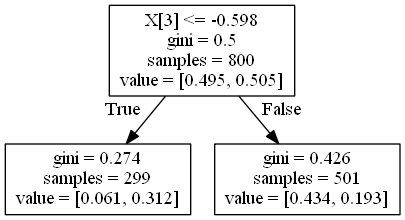

In [130]:
ada_t1 = adaboost.estimators_[0]
ada_t1_viz_file = 'ada-t1.dot'
ada_t1_png_file = 'ada-t1.png'

# create visualization
export_graphviz(ada_t1, out_file=ada_t1_viz_file)

# convert to PNG
command = ["dot", "-Tpng", ada_t1_viz_file, "-o", ada_t1_png_file]
subprocess.check_call(command)

# display image
Image(filename=ada_t1_png_file)

In [131]:
print("Error: {0:.2f}".format(adaboost.estimator_errors_[0]))
print("Tree importance: {0:.2f}".format(adaboost.estimator_weights_[0]))

Error: 0.25
Tree importance: 1.08


# Gradient Boosted Trees

Let's construct a gradient boosted tree consiting of 1000 trees where each successive one will be created with gradient optimization. Again we are going to leave most parameters with their default values, specifiy only maximum depth of the tree to 1 (again decision stumps)

In [132]:
gbc = GradientBoostingClassifier(
    max_depth=1,
    n_estimators=1000,
    warm_start=True,
    random_state=seed)
gbc.fit(X_train, y_train)

# make predictions
gbc_y_pred = gbc.predict(X_test)
gbc_y_pred_prob = gbc.predict_proba(X_test)

# calculate log loss
gbc_accuracy = accuracy_score(y_test, gbc_y_pred)
gbc_logloss = log_loss(y_test, gbc_y_pred_prob)

print("== Gradient Boosting ==")
print("Accuracy: {0:.2f}".format(gbc_accuracy))
print("Log loss: {0:.2f}".format(gbc_logloss))

== Gradient Boosting ==
Accuracy: 0.84
Log loss: 0.34


The obtained results are obviously the best of all presented algorithm. We have obtained most accurate algorithm giving more sensible predictions about class probabilities.

In [133]:
print('True labels:')
print(y_test[:5,])
print('\nPredicted labels:')
print(gbc_y_pred[:5,])
print('\nPredicted probabilities:')
print(gbc_y_pred_prob[:5,])

True labels:
[1 1 0 0 0]

Predicted labels:
[1 0 0 0 0]

Predicted probabilities:
[[0.12344095 0.87655905]
 [0.69217302 0.30782698]
 [0.83598136 0.16401864]
 [0.9159873  0.0840127 ]
 [0.99863653 0.00136347]]


The difference is that GBC uses DecisionTreeRegressor classifier as the estimator with mean-square error as criterion. This results of slightly different output of the tree - now the leaf contains a predicted value (while the first splitting point remains the same).

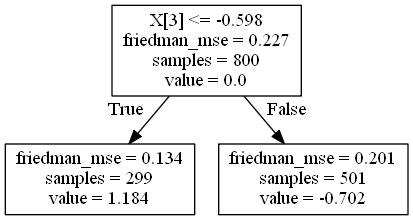

In [134]:
gbc_t1 = gbc.estimators_[2][0]
gbc_t1_viz_file = 'gbc-t1.dot'
gbc_t1_png_file = 'gbc-t1.png'

# create visualization
export_graphviz(gbc_t1, out_file=gbc_t1_viz_file)

# convert to PNG
command = ["dot", "-Tpng", gbc_t1_viz_file, "-o", gbc_t1_png_file]
subprocess.check_call(command)

# display image
Image(filename=gbc_t1_png_file)

In [135]:
# Now take a look at XGBoosting